# MATH 210 Introduction to Mathematical Computing

## March 2, 2016

Today's Agenda:

1. Slope Fields
2. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Slope Fields

Consider a first order ODE $y' = f(y,t)$. For every point $(t_0,y_0)$ in the $y$-$t$ plane, we get a slope $m_0 = f(y_0,t_0)$. This value $m_0$ is exactly the slope at the point $(t_0,y_0)$ of the (unique) solution $y(t)$ that passes through $(t_0,y_0)$. Therefore, even if we can't solve a given ODE, we can at least plot the slope field.

We can plot the **slope field** of a first order ODE $y' = f(y,t)$ by plotting a line of slope $m = f(y,t)$ at each point in a grid of points in the $y$-$t$-plane. The best way to explain this process is just to do an example.

Let's plot the slope field for $y' = y$.

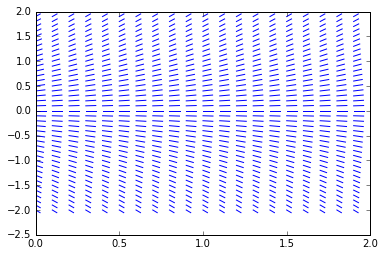

In [14]:
# First, we need arrays of t values and y values
# Chose an arbitrary step size, say 0.1, between grid points
step = 0.1
t = np.arange(0,2,step)
y = np.arange(-2,2,step)

# Define the right side of the ODE y' = y
def f(y,t):
    return y

# For each point (tvalue,yvalue) in the grid defined by the arrays t and y,
# plot a line of length L at the point (tvalue,yvalue)
L = 0.6*step
for tvalue in t:
    for yvalue in y:
        # Compute the slope at point (tvalue,yvalue)
        m = f(yvalue,tvalue)
        # Compute the endpoint of the line of slope m and length L
        # which begins at (tvalue,yvalue)
        dt = L / np.sqrt(1+m**2)
        dy = m*dt
        t1 = tvalue + dt
        y1 = yvalue + dy
        # Plot the line
        plt.plot([tvalue,t1],[yvalue,y1],'b')
plt.show()

We can see that solutions of $y' = y$ for different initial conditions will follow the flow of the slope field and so we get a sense of what shape the solutions take.

Let's take our code above and turn it into a function that we can use on any first order ODE.

In [26]:
def slope_field(f,tinterval,yinterval,step=0.25):
    '''
    Plot the slope field of the ODE y' = f(y,t).
    
    INPUT:
    f - function, the right side of the ODE y' = f(y,t)
    tinterval - list of length 2, the t limits for the grid of the slope field
    yinterval - list of length 2, the y limits for the grid of the slope field
    step - positive number, the distance between grid points
    '''
    
    t0, t1 = tinterval
    y0, y1 = yinterval
    t = np.arange(t0,t1+step,step)
    y = np.arange(y0,y1+step,step)
    for tvalue in t:
        for yvalue in y:
            m = f(yvalue,tvalue)
            L = step*0.6
            dt = L/np.sqrt(1+m**2)
            dy = m*dt
            ts = [tvalue, tvalue + dt]
            ys = [yvalue, yvalue + dy]
            plt.plot(ts,ys,'b')
    plt.xlim([t0,t1])
    plt.ylim([y0,y1])
    plt.show()

Let's use our function to plot the slope field of $y' = y$.

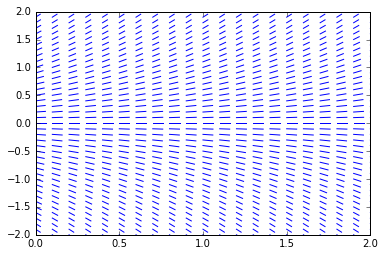

In [27]:
def f(y,t):
    return y

slope_field(f,[0,2],[-2,2],0.1)

**Example.** Plot the slope field of $y' = \sin(y)$ for $t \in [0,5]$ and $y \in [-4,4]$ with step size $0.5$.

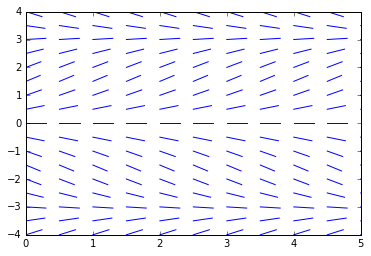

In [28]:
def f(y,t):
    return np.sin(y)

slope_field(f,(0,5),(-4,4),0.5)

## 2. Exercises

**Exercise.** Plot the slope field of $y' = y^2 - t^2$ for $t \in [0,2]$ and $y \in [-2,2]$ with grid step $0.1$.

**Exercise.** Plot the slope field of $y' = \sin(y) + \cos(t)$ for $t \in [0,10]$ and $y \in [0,20]$ with grid step $0.5$.

**Exercise.** Plot the slope field of $y' = \sin(t^2)$ for $t \in [0,5]$ and $y \in [0,2]$ with grid step $0.2$.